## Importing libraries

In [1]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

%matplotlib inline 
from matplotlib import pyplot as plt 
import pylab 
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


## Loading Models

In [2]:
export_dir='age_model_pretrained.h5'
age_model = load_model(export_dir)

# summarize model.
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d (AverageP  (None, 99, 99, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 23, 23, 128)      0

In [3]:
# load and evaluate a saved model
export_dir='gender_model_pretrained.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 70)        700       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 65)        41015     
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 65)       260       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 65)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 60)        35160 

In [4]:
export_dir='emotion_model_pretrained.h5'
emotion_model = load_model(export_dir)

# summarize model.
emotion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [5]:
# Labels on Age, Gender and Emotion to be predicted

age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_ranges = ['male', 'female']
emotion_ranges= ['positive','negative','neutral']

## Loading Test Images

In [6]:
img_path = "family_photo.jpg"

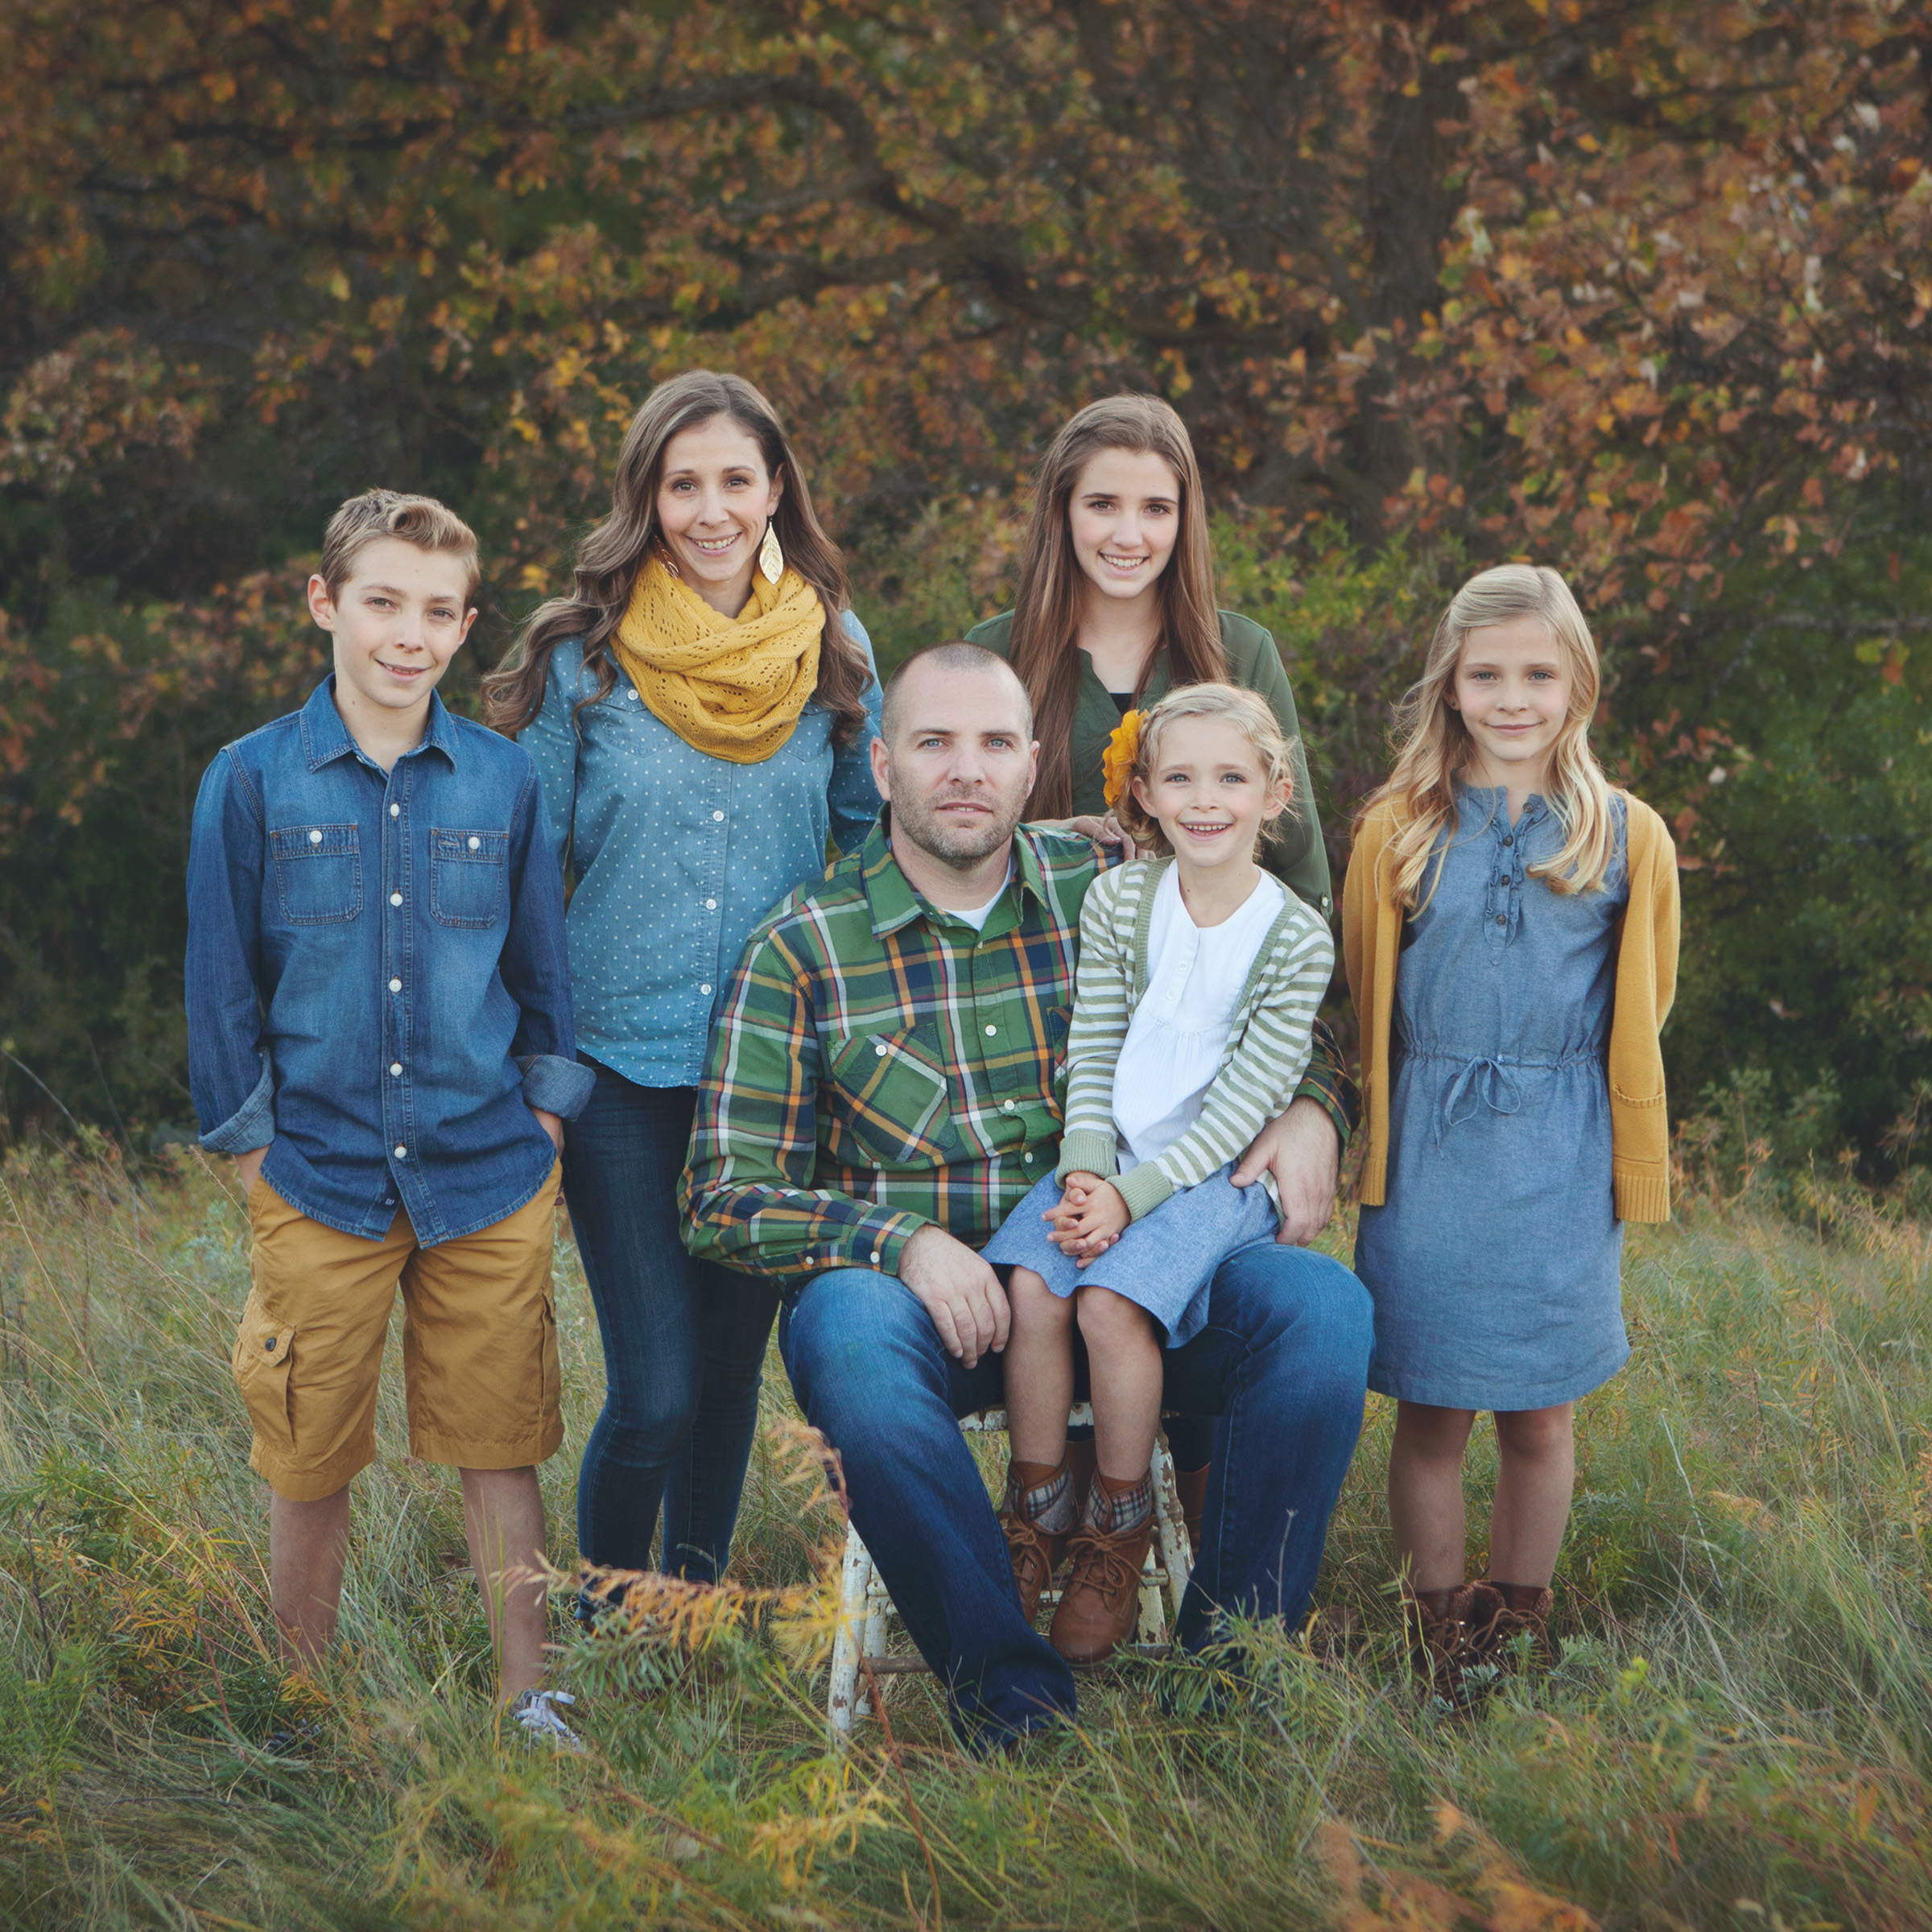

In [7]:
from IPython.display import Image 
pil_img = Image(filename=img_path)
display(pil_img)

## Results on Age/Gender/Emotion

In [8]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]
  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image, str(output_str),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)
  result_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
cv2.imshow("Result", result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

1: female, 28-45, positive
2: female, 21-27, positive
3: female, 3-9, positive
4: female, 3-9, positive
5: male, 3-9, positive
6: male, 10-20, neutral
7: male, 28-45, neutral


Real Time

In [9]:

cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

while True:
  ret, test_image = cap.read()
  gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  i = 0

  for (x,y,w,h) in faces:
    i = i+1
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

    img_gray=gray[y:y+h,x:x+w]

    emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
    emotion_image_array = np.array(emotion_img)
    emotion_input = np.expand_dims(emotion_image_array, axis=0)
    output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]
    
    gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
    gender_image_array = np.array(gender_img)
    gender_input = np.expand_dims(gender_image_array, axis=0)
    output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

    age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
    age_input = age_image.reshape(-1, 200, 200, 1)
    output_age = age_ranges[np.argmax(age_model.predict(age_input))]


    output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
    print(output_str)
    
    col = (0,255,0)

  cv2.putText(test_image, str(output_str),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)
  cv2.imshow('Real Time Feed', test_image)

  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

1: male, 46-65, positive
1: male, 46-65, positive
1: male, 46-65, positive
1: male, 46-65, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 21-27, positive
1: male, 21-27, positive
1: male, 21-27, positive
1: male, 21-27, positive
1: male, 21-27, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 21-27, positive
1: male, 21-27, positive
1: male, 28-45, positive
1: male, 28-45, positive
1: female, 28-45, positive
1: female, 28-45, positive
1: female, 46-65, positive
1: female, 28-45, positive
1: female, 28-45, neutral
1: female, 21-27, positive
1: female, 46-65, neutral
1: male, 28-45, positive
1: male, 28-45, positive
1: male, 28-4